In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Find/Union Algorithm for the percolation problem

In [63]:
class FindUnion:
    def __init__(self,n):
        self.matrix = np.zeros((n,n))
        self.cluster_dictionary = {}
        self.indices = 0
        self.iteration = 0
        self.n_cluster = []
        self.x2_cluster = [] #susceptibility
        
    
    def one_block(self, matrix):
        """
        Write a 1 in a given matrix at random.
        """
        self.indices = zip(*np.where(self.matrix == 0))
        np.random.shuffle(self.indices)
        (ind_0,ind_1) = self.indices[0]
        matrix[ind_0][ind_1] = 1
        return ind_0,ind_1
    
    def union(self,i,j,key):
        """
        Make the union of clusters of a given list of keys and sort indices.
        """
        
        if len(key) == 1:
            self.cluster_dictionary[key[0]].append((i,j))
        
        if len(key) == 2:
            if len(self.cluster_dictionary[key[0]]) > len(self.cluster_dictionary[key[1]]):
                [vv] = self.cluster_dictionary.pop(key[1])
                self.cluster_dictionary[key[0]].append(vv)
                #self.cluster_dictionary[key[0]].append((i,j))
                
            else:
                [vv] = self.cluster_dictionary.pop(key[0])
                self.cluster_dictionary[key[1]].append(vv)
                #self.cluster_dictionary[key[1]].append((i,j))
                
        if len(key) == 3:
            [vv] = self.cluster_dictionary.pop(key[0]) #Too many values to unpack ?
            [vvv] = self.cluster_dictionary.pop(key[1])
            self.cluster_dictionary[key[2]].append(vv)
            self.cluster_dictionary[key[2]].append(vvv)
        
        if len(key) == 4:
            [vv] = self.cluster_dictionary.pop(key[0])
            [vvv] = self.cluster_dictionary.pop(key[1])
            [vvvv] = self.cluster_dictionary.pop(key[2])
            self.cluster_dictionary[key[3]].append(vv)
            self.cluster_dictionary[key[3]].append(vvv)
            self.cluster_dictionary[key[3]].append(vvvv)
            
    
    
    def negbrs(self,i,j):
        """
        Check if the neighbors are part of a cluster.
        If there is only one cluster linked to the neighbor you append to this cluster.
        If there is more than one cluster linked, you merge.
        """
        neigh = False
        key = []
        for vals in self.cluster_dictionary.values():
            if (i+1, j) in vals:
                if self.dict_key_g_value(vals) not in key:
                    key.append(self.dict_key_g_value(vals))
                neigh = True
            if (i, j+1) in vals:
                if self.dict_key_g_value(vals) not in key:
                    key.append(self.dict_key_g_value(vals))
                neigh = True
            if (i-1, j) in vals:
                if self.dict_key_g_value(vals) not in key:
                    key.append(self.dict_key_g_value(vals))
                neigh = True
            if (i, j-1) in vals:
                if self.dict_key_g_value(vals) not in key:
                    key.append(self.dict_key_g_value(vals))
                neigh = True
            self.union(i,j,key)
        return neigh
        
    def dict_key_g_value(self,val):
        """
        Print a key for a given value that already exists on dictionary
        """
        return self.cluster_dictionary.keys()[self.cluster_dictionary.values().index(val)]
    
    def update_dict(self,key,value):
        """Update the dictionary if there is a existing key"""
        self.cluster_dictionary[key] = self.cluster_dictionary[key], value
    
    def image_matrix(self):
        """Plot image of the matrix"""
        plt.imshow(self.matrix)
        plt.show()
    
    def write_block(self):
        """
        Write a 1 in the matrix and feeds cluster dictionary using negbrs.
        """
        ind_0,ind_1 = self.one_block(self.matrix)
        check_neighbors = self.negbrs(ind_0,ind_1)
        if check_neighbors == False:
            self.cluster_dictionary[self.iteration] = [(ind_0,ind_1)]
            self.iteration += 1
    
    def dic_statistics(self):
        """
        Give a np.array with the number of clusters.
        """
        c_number = []
        for i in self.cluster_dictionary.keys():
            c_number.append(len(b.cluster_dictionary[i]))
        c_number.sort()
        return np.array(c_number)
    
    def plot_histograms(self):
        """
        Plot the histogram.
        """
        for i in self.n_cluster:
            plt.hist(i)
        plt.show()
   
    def check_percolation(self):
        percolation = False
        for i in range(n):
            for vals in self.cluster_dictionary.values():
                if (0,i) in vals:
                    if (n-1,i) in vals:
                        percolation = True
                        break
        return percolation
    
    def iterate(self,m, plot= False):
        """
        Do m iterations and write statistics for each step.
        Plot these interactions puting plot = True
        """
        for _ in range(m):
            self.write_block()
            self.n_cluster.append(self.dic_statistics())
            check = self.check_percolation()
            if plot == True:
                plt.imshow(self.matrix)
                plt.show()
            if check == True:
                print("Percolated")
                break
        

In [64]:
n = 3
b = FindUnion(n)

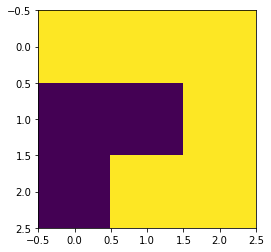

In [74]:
b.iterate(1, plot= True)

In [75]:
b.cluster_dictionary

{1: [(2, 2), (2, 1), (1, 2)], 2: [(0, 0)]}

In [59]:
b.check_percolation()

((0, 0), (3, 0))
((0, 1), (3, 1))
((0, 2), (3, 2))


True

In [14]:
b.n_cluster

[array([1]), array([1, 1]), array([3]), array([1, 3]), array([5]), array([6])]